<a href="https://colab.research.google.com/github/AlflenGabriel/algoritmo-classificacao/blob/main/ClassificacaoIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
nameColumns = ['SepalLength','SepalWidth','PetalLength','PetalWidth', 'Class']
dataFrame = pd.read_csv('/content/iris.data', names = nameColumns)
print("Linhas: %d, Colunas: %d" % (len(dataFrame), len(dataFrame.columns)))

Linhas: 150, Colunas: 5


Vamos visualizar as primeiras linhas do data frame

In [ ]:
dataFrame.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Vamos contar quantas flores de cada categoria há no dataframe.
Quantas setosa? Quantas versicolor? Quantas virginca?

In [ ]:
dataFrame['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

Agora que vimos os quantitativos de cada classe, vamos mostrar isso em um gráfico.

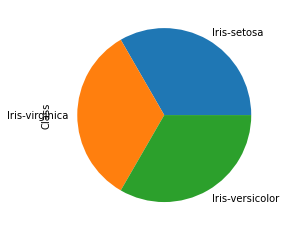

In [ ]:
dataFrame['Class'].value_counts().plot(kind='pie')

Vamos enriquecer o nosso dataframe criando mais duas colunas.

In [ ]:
dataFrame['SepalArea']=dataFrame['SepalLength']*dataFrame['SepalWidth']
dataFrame['PetalArea']=dataFrame['PetalLength']*dataFrame['PetalWidth']
dataFrame.head()
#dataFrame[['SepalLength','Class', 'SepalWidth']]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


Vamos ver mais um comandos do Python para nos ajudar a entender os dados.

In [ ]:
print(dataFrame['SepalLength'].min())
print(dataFrame['SepalLength'].max())
print(dataFrame['SepalLength'].mean())

4.3
7.9
5.843333333333335


Vamos criar mais features.

In [ ]:
dataFrame['SepalLengthAboveMean']=dataFrame['SepalLength']>dataFrame['SepalLength'].mean()
dataFrame['SepalWidthAboveMean']=dataFrame['SepalWidth']>dataFrame['SepalWidth'].mean()
dataFrame['PetalLengthAboveMean']=dataFrame['PetalLength']>dataFrame['PetalLength'].mean()
dataFrame['PetalWidthAboveMean']=dataFrame['PetalWidth']>dataFrame['PetalWidth'].mean()
dataFrame.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


Agora que temos o dataframe com dados consistentes, vamos partir para a análise.
1º passo: separar os valores das features.

In [ ]:
features = dataFrame.columns.difference(['Class'])
features

Index(['PetalArea', 'PetalLength', 'PetalLengthAboveMean', 'PetalWidth',
       'PetalWidthAboveMean', 'SepalArea', 'SepalLength',
       'SepalLengthAboveMean', 'SepalWidth', 'SepalWidthAboveMean'],
      dtype='object')

Na análise de dados, normalmente, criamos duas variáveis: X e y. A X contempla os valores das features e a y contempla os valores das classes.

In [ ]:
#variáveis independetes
X = dataFrame[features].values

#variável dependente
y = dataFrame['Class'].values

print (X)

[[0.27999999999999997 1.4 False ... False 3.5 True]
 [0.27999999999999997 1.4 False ... False 3.0 False]
 [0.26 1.3 False ... False 3.2 True]
 ...
 [10.4 5.2 True ... True 3.0 False]
 [12.42 5.4 True ... True 3.4 True]
 [9.18 5.1 True ... True 3.0 False]]


Agora vamos partir para a aplicação do algoritmo de aprendizagem de máquina. O primeiro passo será importar o algoritmo que irá criar a árvore de decisão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Vamos gerar o objeto classificador. Este objeto irá utilizar os dados e criará a árvore a partir dos dados informados.

In [ ]:
#criação do objeto que fará a classificação
classifier_dt = DecisionTreeClassifier(random_state=10, criterion='gini', max_depth=2)
#Realização do treinamento para gerar a árvore a partir dos dados indenpentes (X) e depentende (y)
classifier_dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

Vamos ver a árvore que foi criada

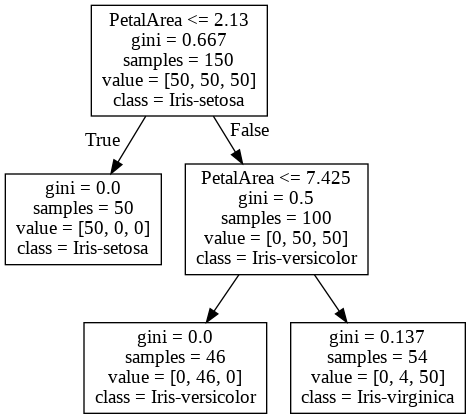

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(classifier_dt, out_file=None,
                                feature_names=features,
                                class_names=dataFrame.Class.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Vamos testar se o classificador está bom

In [ ]:
# Iris-setosa
sample1 = [5.1,3.5,1.4,0.2,17.85,0.28, False, True, False, False]
# Iris-versicolor
sample2 = [7.0,3.2,4.7,1.4,22.40, 6.58, True, True, True, True]
# Iris-virginica
sample3 = [6.3,3.3,6.0,2.5,20.79, 15.00, True, True, True, True]
#????
sample4 = [2.3,5.3,8.0,10.5,25.80, 10.00, False, True, True, True]
#????
sample5 = [8.3,3.3,1.0,1.5,24.80, 1.00, False, True, False, False]
sample = pd.DataFrame([sample1, sample2, sample3, sample4, sample5], columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','SepalArea','PetalArea','SepalLengthAboveMean','SepalWidthAboveMean','PetalLengthAboveMean','PetalWidthAboveMean'])
sample = sample[features].values
sample

classifier_dt.predict(sample)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

No algoritmo acima, utilizamos todos os registros para o treinamento que gerou a árvore. No entanto, isso não é aconselhável, pois pode resultar em overfitting.
Para evitar overfitting, separamos parte da base para não entrar no escopo do treinamento para que seja utilizada para testar.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print("Quantida de linhas para treinamento: %d" % (len(X_train)))
print("Quantida de linhas  para teste:%d" % (len(X_test)))

Quantida de linhas para treinamento: 135
Quantida de linhas  para teste:15


Agora que separamos dados de treinamento dos de teste, vamos criar uma nova árvore.

In [ ]:
classifier_dt2 = DecisionTreeClassifier(random_state=10, criterion='gini', max_depth=2)
#Realização do treinamento para gerar a árvore a partir dos dados indenpentes (X) e depentende (y)
classifier_dt2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

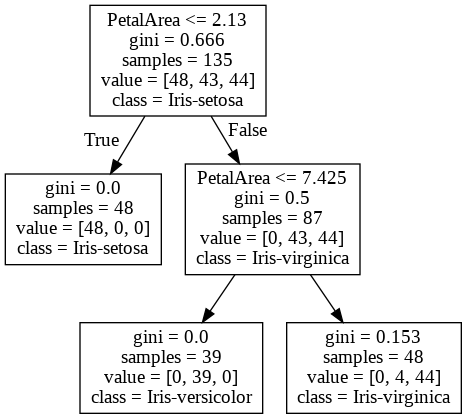

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(classifier_dt2, out_file=None,
                                feature_names=features,
                                class_names=dataFrame.Class.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

Uma vez que a árvore foi gerada com os dados de treinamento, chegou a hora de utizarmos os dados separados para teste para validar a árvore que foi gerada

In [ ]:
from sklearn.metrics import accuracy_score
print(X_test)
#print(y_test) # valores reais
y_pred = classifier_dt2.predict(X_test)
y_pred
accuracy = accuracy_score(y_test,y_pred)
accuracy

[[6.58 4.7 True 1.4 True 17.689999999999998 6.1 True 2.9 False]
 [6.58 4.7 True 1.4 True 22.400000000000002 7.0 True 3.2 True]
 [13.57 5.9 True 2.3 True 21.76 6.8 True 3.2 True]
 [5.33 4.1 True 1.3 True 15.959999999999999 5.7 False 2.8 False]
 [5.9799999999999995 4.6 True 1.3 True 19.139999999999997 6.6 True 2.9
  False]
 [0.42 1.4 False 0.3 False 14.399999999999999 4.8 False 3.0 False]
 [5.46 3.9 True 1.4 True 14.040000000000001 5.2 False 2.7 False]
 [8.82 4.9 True 1.8 True 18.299999999999997 6.1 True 3.0 False]
 [0.44999999999999996 1.5 False 0.3 False 19.38 5.1 False 3.8 True]
 [4.1 4.1 True 1.0 False 15.66 5.8 False 2.7 False]
 [15.0 6.0 True 2.5 True 20.79 6.3 True 3.3 True]
 [9.5 5.0 True 1.9 True 15.75 6.3 True 2.5 False]
 [9.18 5.1 True 1.8 True 17.700000000000003 5.9 True 3.0 False]
 [10.8 6.0 True 1.8 True 23.040000000000003 7.2 True 3.2 True]
 [7.3500000000000005 4.9 True 1.5 True 21.39 6.9 True 3.1 True]]


1.0